# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
#Inspecting the data sample
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temps = "metric"
city_url=f"{base_url}&q={city}&appid={weather_api_key}&units={temps}"
sample=requests.get(city_url).json()
sample

{'coord': {'lon': 24.8753, 'lat': 60.1594},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 13.61,
  'feels_like': 13.43,
  'temp_min': 13.16,
  'temp_max': 14.34,
  'pressure': 986,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 16.99, 'deg': 223, 'gust': 21.46},
 'rain': {'1h': 0.8},
 'clouds': {'all': 75},
 'dt': 1697036536,
 'sys': {'type': 2,
  'id': 20457,
  'country': 'FI',
  'sunrise': 1696999733,
  'sunset': 1697037932},
 'timezone': 10800,
 'id': 6691859,
 'name': 'Lauttasaari',
 'cod': 200}

In [5]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temps = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}&appid={weather_api_key}&units={temps}"
    city_json_data = requests.get(city_url).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json_data['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json_data['coord']['lat']
        city_lng = city_json_data['coord']['lon']
        city_max_temp = city_json_data['main']['temp_max']
        city_humidity = city_json_data['main']['humidity']
        city_clouds = city_json_data['clouds']['all']
        city_wind = city_json_data['wind']['speed']
        city_country = city_json_data['sys']['country']
        city_date = city_json_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | cole harbour
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mollendo
Processing Record 6 of Set 1 | jiutai
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | maintirano
Processing Record 9 of Set 1 | figuig (centre)
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kuala terengganu
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | batumi
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | brookings
Proc

Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | yaren
Processing Record 44 of Set 4 | shingu
Processing Record 45 of Set 4 | uliastay
Processing Record 46 of Set 4 | tazacorte
Processing Record 47 of Set 4 | san agustin
Processing Record 48 of Set 4 | vorgashor
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | marsh harbour
Processing Record 1 of Set 5 | smithers
Processing Record 2 of Set 5 | aldama
Processing Record 3 of Set 5 | sabang
Processing Record 4 of Set 5 | domoni
Processing Record 5 of Set 5 | ube
Processing Record 6 of Set 5 | okha
Processing Record 7 of Set 5 | roma
Processing Record 8 of Set 5 | kutum
Processing Record 9 of Set 5 | manokwari
Processing Record 10 of Set 5 | whitehorse
Processing Record 11 of Set 5 | porto seguro
Processing Record 12 of Set 5 | nuuk
Processing Record 13 of Set 5 | vila do maio
Processing Record 14 of Set 5 | paciran
Processing Record 15 of Set 5 | tsiombe
Processing Record 16 of Set 5 | quellon
Pro

Processing Record 34 of Set 8 | cidreira
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | mingelchaur
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | viet tri
Processing Record 39 of Set 8 | linxia chengguanzhen
Processing Record 40 of Set 8 | alaghsas
Processing Record 41 of Set 8 | sandnessjoen
Processing Record 42 of Set 8 | palangkaraya
Processing Record 43 of Set 8 | menongue
Processing Record 44 of Set 8 | aykhal
Processing Record 45 of Set 8 | jining
Processing Record 46 of Set 8 | elliot lake
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | al ghayzah
Processing Record 49 of Set 8 | coquimbo
Processing Record 0 of Set 9 | priob'ye
Processing Record 1 of Set 9 | dolores
Processing Record 2 of Set 9 | nar'yan-mar
Processing Record 3 of Set 9 | mukhorshibir'
City not found. Skipping...
Processing Record 4 of Set 9 | masterton
Processing Record 5 of Set 9 | amahai
Processing Record 6 of Set 9 | yangquan
Process

Processing Record 27 of Set 12 | jenbach
Processing Record 28 of Set 12 | cockburn town
Processing Record 29 of Set 12 | nowshera cantonment
Processing Record 30 of Set 12 | buka
Processing Record 31 of Set 12 | lospalos
Processing Record 32 of Set 12 | agnibilekrou
Processing Record 33 of Set 12 | bossangoa
Processing Record 34 of Set 12 | tallahassee
Processing Record 35 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 36 of Set 12 | upington
Processing Record 37 of Set 12 | les anglais
Processing Record 38 of Set 12 | lupane
Processing Record 39 of Set 12 | tulun
Processing Record 40 of Set 12 | kayangel
Processing Record 41 of Set 12 | siwana
Processing Record 42 of Set 12 | yelizovo
Processing Record 43 of Set 12 | turkmenbasy
Processing Record 44 of Set 12 | oskaloosa
Processing Record 45 of Set 12 | visby
Processing Record 46 of Set 12 | mangrol
Processing Record 47 of Set 12 | tual
Processing Record 48 of Set 12 | general acha
Processing Record 49 of Set 12 |

In [6]:
# Convert the cities weather data int|o a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,26.37,92,100,25.17,MP,1696945238
1,georgetown,5.4112,100.3354,28.86,87,20,4.12,MY,1696945107
2,cole harbour,44.6724,-63.4751,14.28,83,20,5.66,CA,1696945234
3,port-aux-francais,-49.3500,70.2167,1.31,68,99,18.45,TF,1696945239
4,mollendo,-17.0231,-72.0147,19.06,77,89,3.66,PE,1696945239


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,26.37,92,100,25.17,MP,1696945238
1,georgetown,5.4112,100.3354,28.86,87,20,4.12,MY,1696945107
2,cole harbour,44.6724,-63.4751,14.28,83,20,5.66,CA,1696945234
3,port-aux-francais,-49.3500,70.2167,1.31,68,99,18.45,TF,1696945239
4,mollendo,-17.0231,-72.0147,19.06,77,89,3.66,PE,1696945239


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

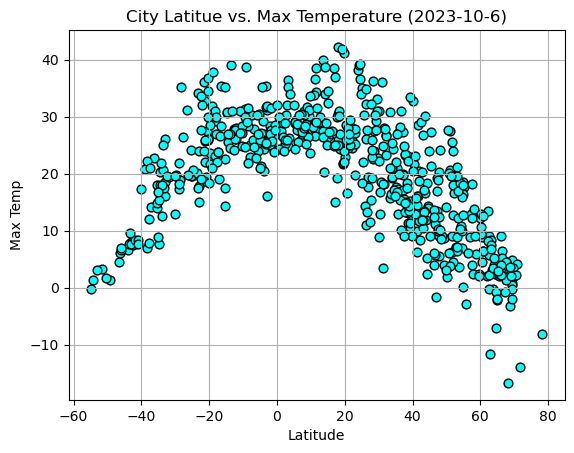

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat', 'Max Temp', xlabel='Latitude', 
                  title= 'City Latitue vs. Max Temperature (2023-10-6)', kind='scatter', c='cyan', edgecolor='black', marker='o', s=40) 
plt.grid(True)

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

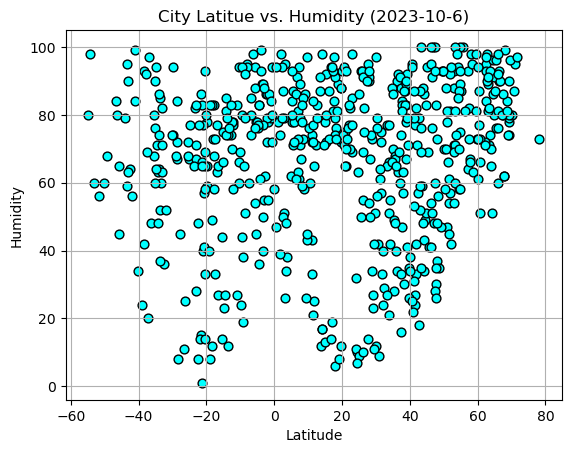

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', xlabel='Latitude', kind='scatter',
                  title= 'City Latitue vs. Humidity (2023-10-6)',c='cyan', edgecolor='black', marker='o', s=40) 


# Incorporate the other graph properties
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

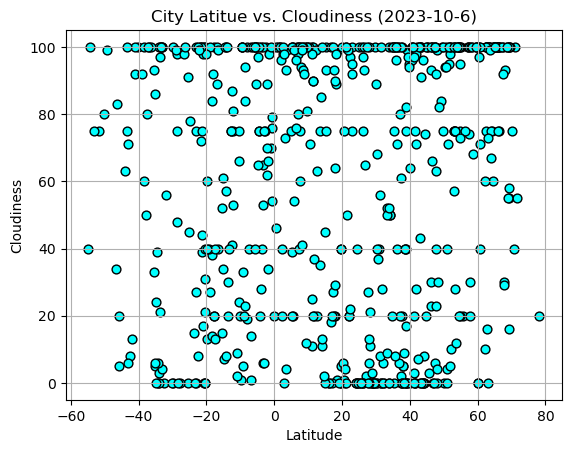

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', xlabel='Latitude',
                  title= 'City Latitue vs. Cloudiness (2023-10-6)', kind='scatter', c='cyan', edgecolor='black', marker='o', s=40) 

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

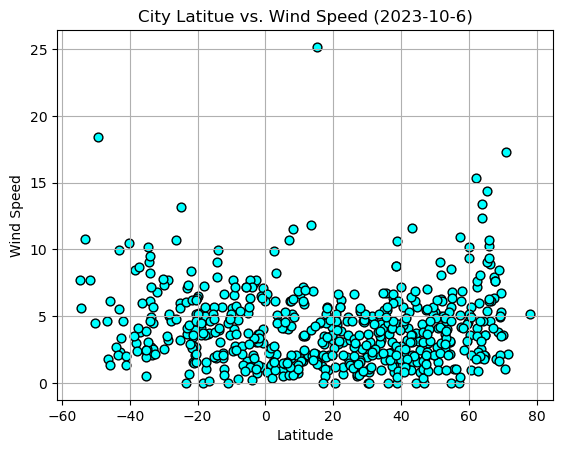

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', xlabel='Latitude', 
                  title= 'City Latitue vs. Wind Speed (2023-10-6)', kind='scatter', c='cyan', edgecolor='black', marker='o', s=40) 

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def lin_regress(xval, yval, x_label, y_label): 
    x_values = xval
    y_values = yval
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='blueviolet')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=15,color="red")
    plt.legend(['Regression Line: y = {:.2f}x + {:.2f}'.format(slope, intercept)])
    print("The r-value is: ",rvalue)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,26.37,92,100,25.17,MP,1696945238
1,georgetown,5.4112,100.3354,28.86,87,20,4.12,MY,1696945107
2,cole harbour,44.6724,-63.4751,14.28,83,20,5.66,CA,1696945234
5,jiutai,44.1525,125.8328,5.19,43,0,1.80,CN,1696945239
6,bilibino,68.0546,166.4372,-16.69,99,93,1.82,RU,1696945239


In [16]:
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,1.31,68,99,18.45,TF,1696945239
4,mollendo,-17.0231,-72.0147,19.06,77,89,3.66,PE,1696945239
7,maintirano,-18.0667,44.0167,26.86,73,92,7.23,MG,1696945239
9,grytviken,-54.2811,-36.5092,1.32,98,100,5.60,GS,1696945240
14,fale old settlement,-9.3852,-171.2468,28.31,80,100,6.56,TK,1696945240


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.814557171238198


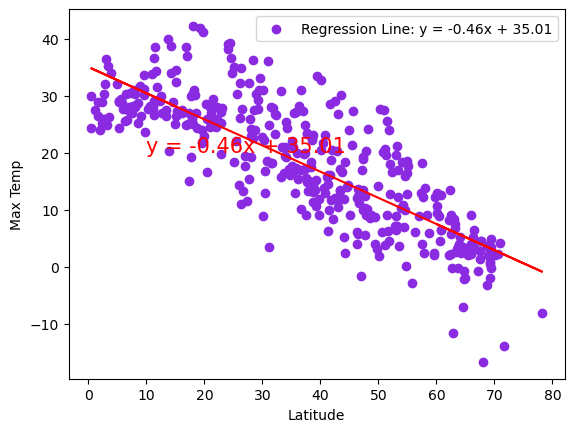

In [17]:
# Linear regression on Northern Hemisphere
x_argument=northern_hemi_df['Lat']
y_argument=northern_hemi_df['Max Temp']
lin_regress(x_argument, y_argument, "Latitude", "Max Temp")

The r-value is:  0.7515810633761815


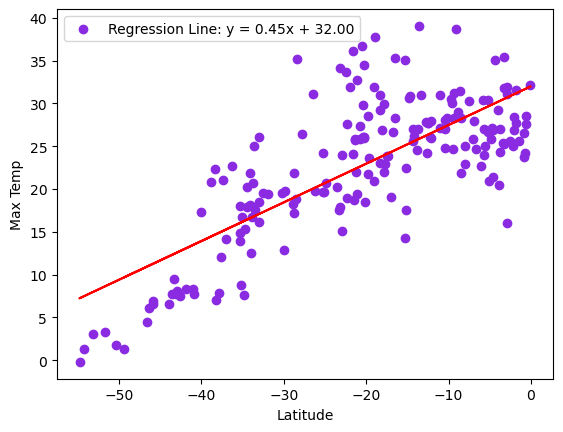

In [18]:
# Linear regression on Southern Hemisphere
x_argument=southern_hemi_df['Lat']
y_argument=southern_hemi_df['Max Temp']
lin_regress(x_argument, y_argument, "Latitude", "Max Temp")

**Discussion about the linear relationship:**

North Hemisphere:
Temperature and Latitude are inversely related in the Northern hemisphere, with a strong correlation factor. With increasing latitude, the temperature reduces towards zero. In the above plot forNorthern hemisphere, it is clearly visible that there is a linear relationship between temperature and latitude. When the latitude values increases and progresses towards the north pole, the temperatures reduce in the northern hemisphere in a progrssive linear manner. 

Southern Hemisphere: 
Temperature and Latitude are positively related in the Southern hemisphere and are strongly correlated. With increasing latitude, the temperature also rises. In the above plot, it is clearly visible that there is a linear replationship between temperature and latitude. When the latitude values increases and progresses towards the equator, the temperatures rise in the Southern hemisphere. 

Above observations are based on the randomized samples obtained through a randomizer function in Python code. The findings seem in line with observed weather patterns around the globe. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.17721445450815873


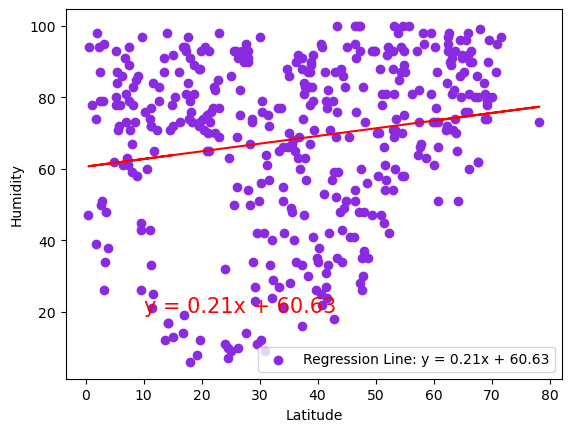

In [19]:
# Northern Hemisphere
x_argument=northern_hemi_df['Lat']
y_argument=northern_hemi_df['Humidity']
lin_regress(x_argument, y_argument, "Latitude", "Humidity")

The r-value is:  0.06646601175280642


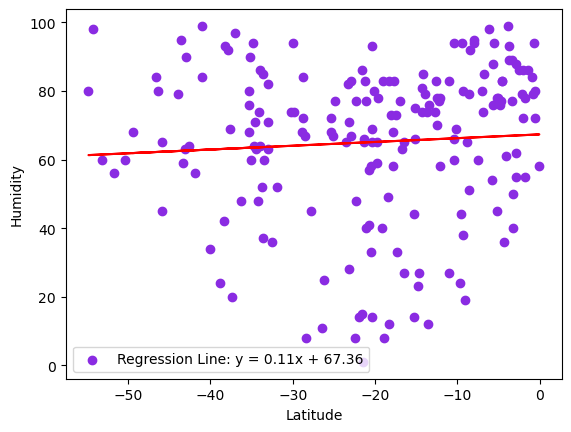

In [20]:
# Southern Hemisphere
x_argument=southern_hemi_df['Lat']
y_argument=southern_hemi_df['Humidity']
lin_regress(x_argument, y_argument, "Latitude", "Humidity")

**Discussion about the linear relationship:**  
There is a very insignificant relationship between observed humidity and lalitude irrespective of the Northern or Southern hemisphere. In the random samples obtained above, the Southern hemisphere seems to have a slightly stronger relationship with humidity compared to the Northern hemisphere. It also appears that humidity is more densely observed in the Northern hemisphere at higher temperatures compared to the Southern hemisphere for the given samples. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.12142616551147446


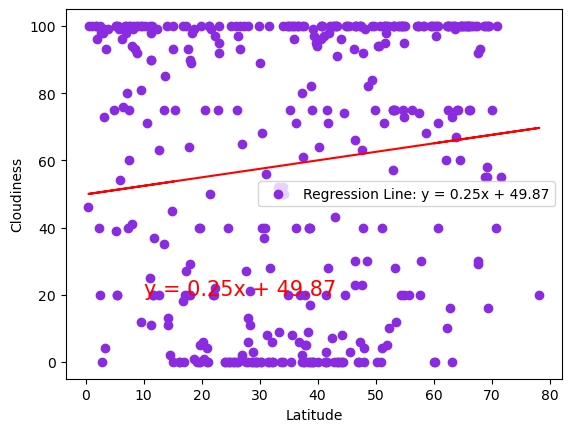

In [21]:
x_argument=northern_hemi_df['Lat']
y_argument=northern_hemi_df['Cloudiness']
lin_regress(x_argument, y_argument, "Latitude", "Cloudiness")

The r-value is:  0.04003868411986564


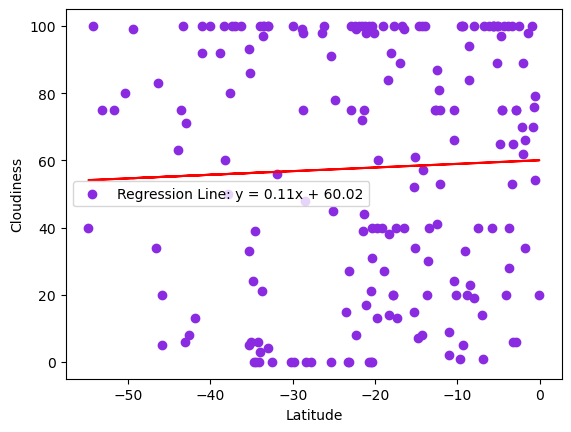

In [22]:
# Southern Hemisphere
x_argument=southern_hemi_df['Lat']
y_argument=southern_hemi_df['Cloudiness']
lin_regress(x_argument, y_argument, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 

It would appear in the given sample set that there is a very weak correlation between cloudiness and latitudinal position of the earth. This correlation is consistent in both the Northern as well as the Southern hemisphere. This is evidenced by the low r-values obtained in either case above. The findings were observed based on a randomized sample set obtained through a Python program.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.18853869904648782


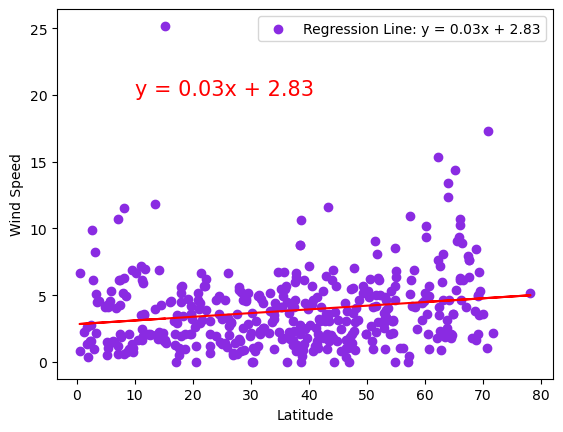

In [23]:
x_argument=northern_hemi_df['Lat']
y_argument=northern_hemi_df['Wind Speed']
lin_regress(x_argument, y_argument, "Latitude", "Wind Speed")

The r-value is:  -0.23066187015404457


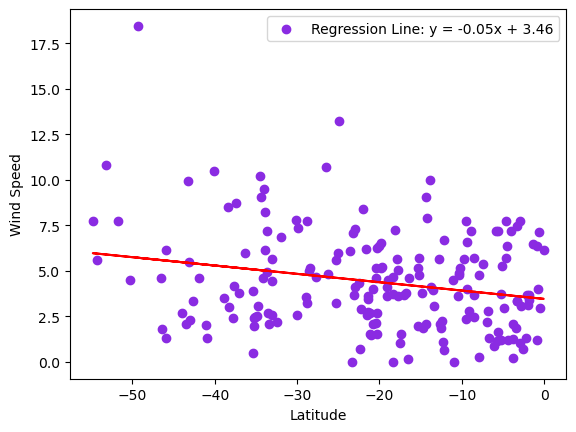

In [24]:
# Southern Hemisphere
x_argument=southern_hemi_df['Lat']
y_argument=southern_hemi_df['Wind Speed']
lin_regress(x_argument, y_argument, "Latitude", "Wind Speed")